In [41]:
# Written by Hunor Csala

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plots
import os
import time

input_path = './'
output_path = './'


In [2]:
#read file ids and file names for train and val data
train_df = pd.read_csv(input_path+'train.csv')
val_df= pd.read_csv(input_path+'val.csv')
#print 5 rows of pandas dataframe
train_df.head()

id      dx_m                          rho_filename  \
0 -5634614311666768042  0.000041  RHO_kgm-3_id-5634614311666768042.dat   
1 -2337253536160728058  0.000041  RHO_kgm-3_id-2337253536160728058.dat   
2 -7056668419406715714  0.000041  RHO_kgm-3_id-7056668419406715714.dat   
3 -9138984573931233156  0.000041  RHO_kgm-3_id-9138984573931233156.dat   
4  2699082921033192879  0.000041   RHO_kgm-3_id2699082921033192879.dat   

                          ux_filename                         uy_filename  \
0  UX_ms-1_id-5634614311666768042.dat  UY_ms-1_id-5634614311666768042.dat   
1  UX_ms-1_id-2337253536160728058.dat  UY_ms-1_id-2337253536160728058.dat   
2  UX_ms-1_id-7056668419406715714.dat  UY_ms-1_id-7056668419406715714.dat   
3  UX_ms-1_id-9138984573931233156.dat  UY_ms-1_id-9138984573931233156.dat   
4   UX_ms-1_id2699082921033192879.dat   UY_ms-1_id2699082921033192879.dat   

                          uz_filename  
0  UZ_ms-1_id-5634614311666768042.dat  
1  UZ_ms-1_id-2337253536160728058.dat  
2  UZ_ms-1_id-7056668419406715714.dat  
3  UZ_ms-1_id-9138984573931233156.dat  
4   UZ_ms-1_id2699082921033192879.dat

In [3]:
# define number of training and val samples
train_samples = train_df.shape[0]
val_samples = val_df.shape[0]

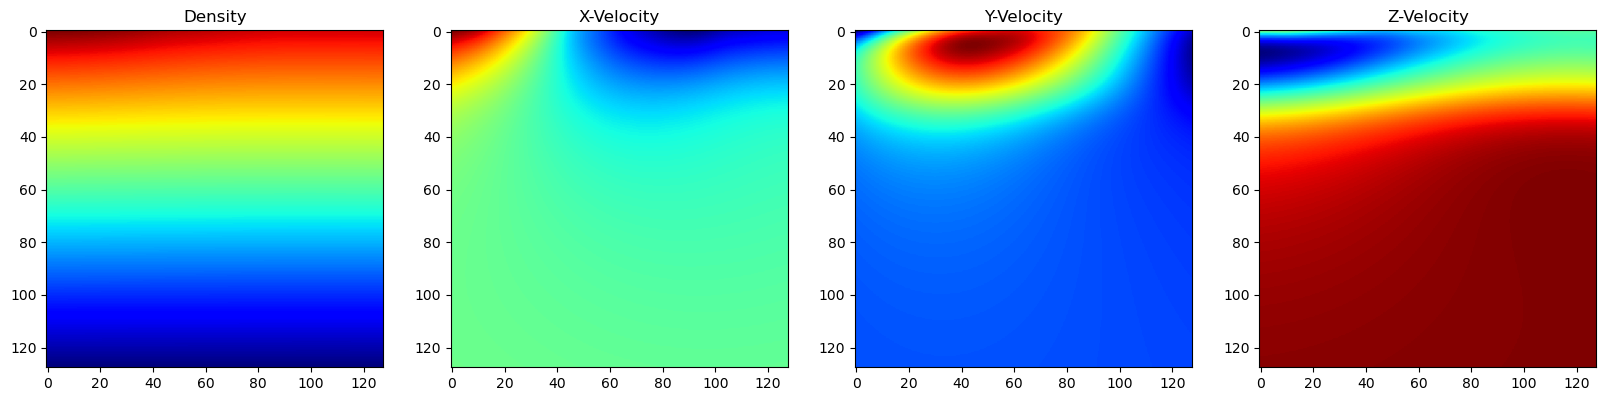

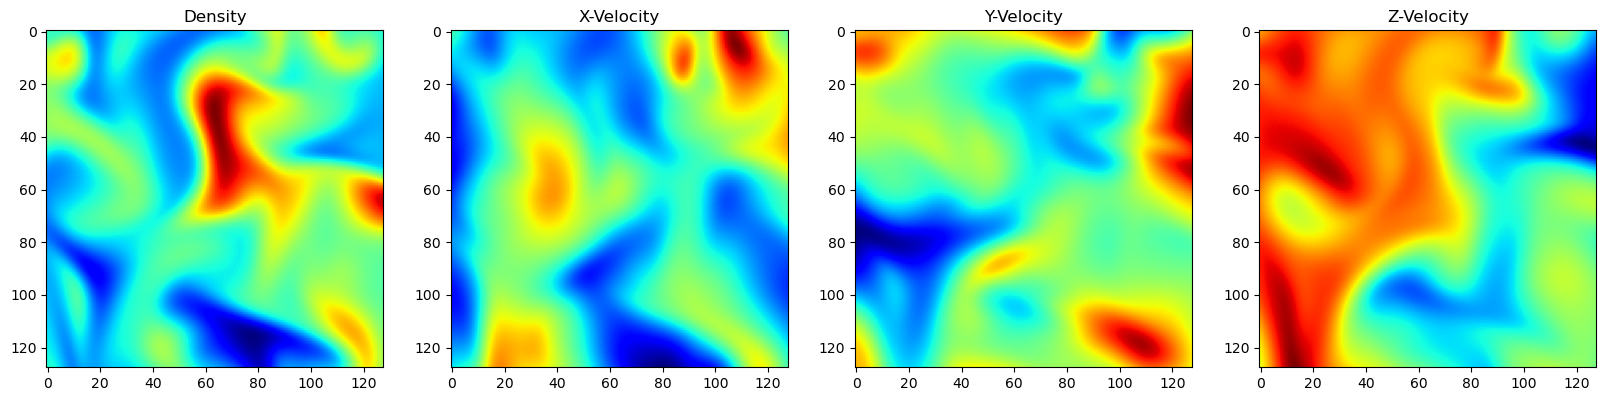

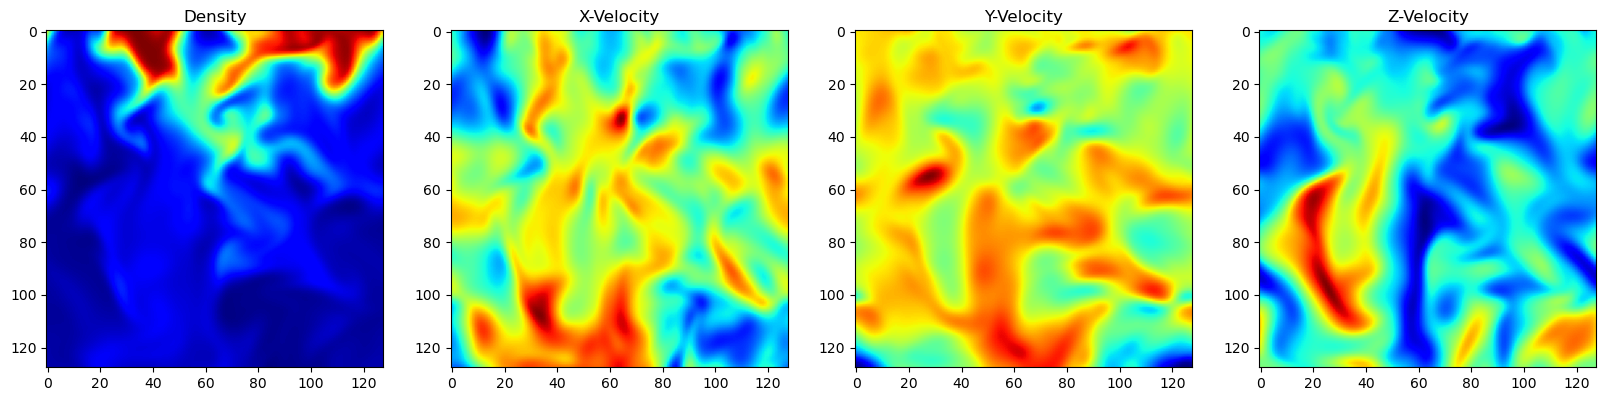

In [64]:
#plot HR labels

data_path = input_path+"flowfields/HR/train"
# Create a list of idx values from 1 to 1000
idx_list = list(range(0, 3))

# Loop through the idx values
for idx in idx_list:
    RHO_filename = train_df['rho_filename'][idx]
    UX_filename = train_df['ux_filename'][idx]
    UY_filename = train_df['uy_filename'][idx]
    UZ_filename = train_df['uz_filename'][idx]
    RHO = np.fromfile(data_path + "/" + RHO_filename, dtype="<f4")
    UX = np.fromfile(data_path + "/" + UX_filename, dtype="<f4")
    UY = np.fromfile(data_path + "/" + UY_filename, dtype="<f4")
    UZ = np.fromfile(data_path + "/" + UZ_filename, dtype="<f4")

    # Create subplots
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(RHO.reshape(128, 128), cmap='jet')
    axs[0].set_title('Density')
    axs[1].imshow(UX.reshape(128, 128), cmap='jet')
    axs[1].set_title('X-Velocity')
    axs[2].imshow(UY.reshape(128, 128), cmap='jet')
    axs[2].set_title('Y-Velocity')
    axs[3].imshow(UZ.reshape(128, 128), cmap='jet')
    axs[3].set_title('Z-Velocity')

    # Show the plot
plt.show()

In [65]:
# HR training
# save HR training data as png files

data_path = input_path+"flowfields/HR/train"
idx_list = list(range(0, train_samples))

# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((128, 128, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    UX_filename = train_df['ux_filename'][idx]
    UY_filename = train_df['uy_filename'][idx]
    UZ_filename = train_df['uz_filename'][idx]
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)

    combined_image[..., 0] = ((UX - UX_min) / (UX_max - UX_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(128, 128).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/train/hr_128/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

In [66]:
# HR validation
# save HR validation data as png files

data_path = input_path+"flowfields/HR/val"
idx_list = list(range(0, val_samples))

# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((128, 128, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    UX_filename = val_df['ux_filename'][idx]
    UY_filename = val_df['uy_filename'][idx]
    UZ_filename = val_df['uz_filename'][idx]
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)

    combined_image[..., 0] = ((UX - UX_min) / (UX_max - UX_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(128, 128).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/val/hr_128/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

In [67]:
# LR training
# save low-res training data

data_path = input_path+"flowfields/LR/train"
idx_list = list(range(0, val_samples))

# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((16, 16, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    UX_filename = train_df['ux_filename'][idx]
    UY_filename = train_df['uy_filename'][idx]
    UZ_filename = train_df['uz_filename'][idx]
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)

    combined_image[..., 0] = ((UX - UX_min) / (UX_max - UX_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(16, 16).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/train/lr_16/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

In [68]:
# save low-res val data as png files

data_path = input_path + "flowfields/LR/val"


idx_list = list(range(0, val_samples))

# Loop through the idx values
for idx in idx_list:
    # Create an empty array to accumulate channels
    combined_image = np.zeros((16, 16, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    UX_filename = val_df['ux_filename'][idx]
    UY_filename = val_df['uy_filename'][idx]
    UZ_filename = val_df['uz_filename'][idx]
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)

    combined_image[..., 0] = ((UX - UX_min) / (UX_max - UX_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(16, 16).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/val/lr_16/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()


In [69]:
# LR testing

# save low-res test data as png

test_df = pd.read_csv(input_path+'/test.csv')
test_samples = test_df.shape[0]
data_path = input_path+"flowfields/LR/test"
idx_list = list(range(0, test_samples))

# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((16, 16, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    UX_filename = test_df['ux_filename'][idx]
    UY_filename = test_df['uy_filename'][idx]
    UZ_filename = test_df['uz_filename'][idx]
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)

    combined_image[..., 0] = ((UX - UX_min) / (UX_max - UX_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(16, 16).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/test/lr_16/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

# Load SR3 model results #

In [70]:
import cv2

# Define the directory where the images are located
# validation
image_directory = "../../../experiments/sr_flame_ai_230912_130804/results"  # Replace with the actual path

# Define the number of images
num_images = 173

# Initialize empty arrays for high_res and super_res images
high_res_val = []
super_res_val = []

# Loop through the image numbers
for image_number in range(1, num_images + 1):
    # Define the image filenames
    hr_filename = f"{image_directory}/0_{image_number}_hr.png"
    sr_filename = f"{image_directory}/0_{image_number}_sr.png"

    # Read the high-resolution and super-resolution images
    hr_image = cv2.imread(hr_filename)
    sr_image = cv2.imread(sr_filename)

    # Append the images to the respective arrays
    high_res_val.append(hr_image)
    super_res_val.append(sr_image)

# Convert the lists to NumPy arrays for easier manipulation
high_res_val = np.array(high_res_val)
super_res_val = np.array(super_res_val)

# Now, high_res and super_res contain the loaded images as NumPy arrays
# high_res[i] corresponds to the high-resolution image for index i
# super_res[i] corresponds to the super-resolution image for index i


Sample  0


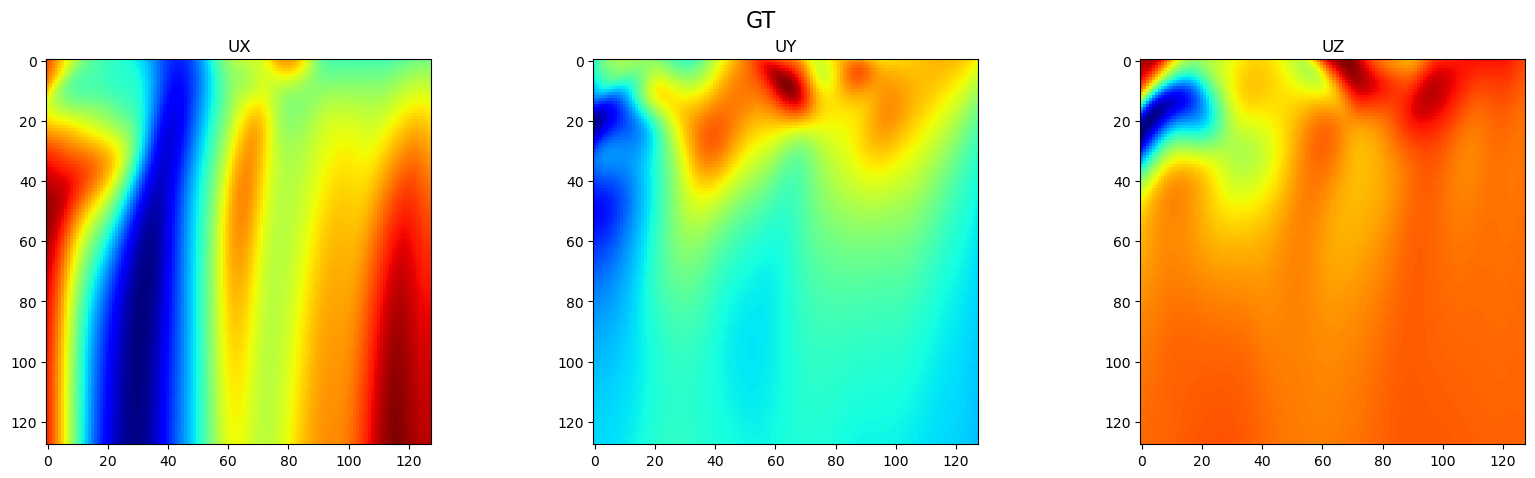

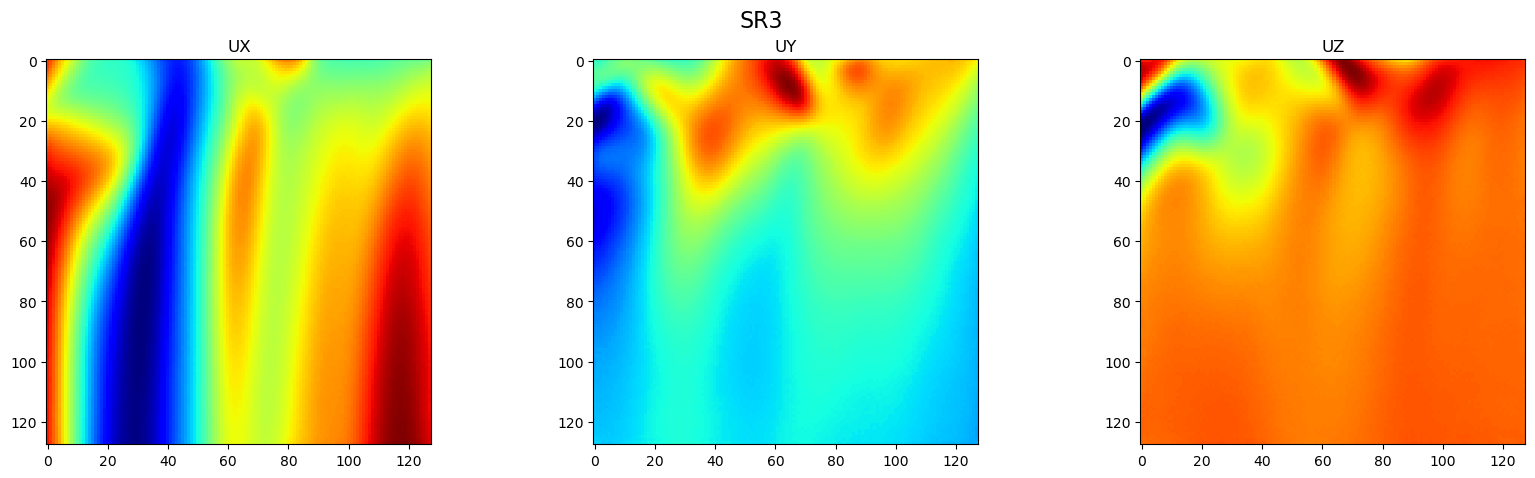

Sample  1


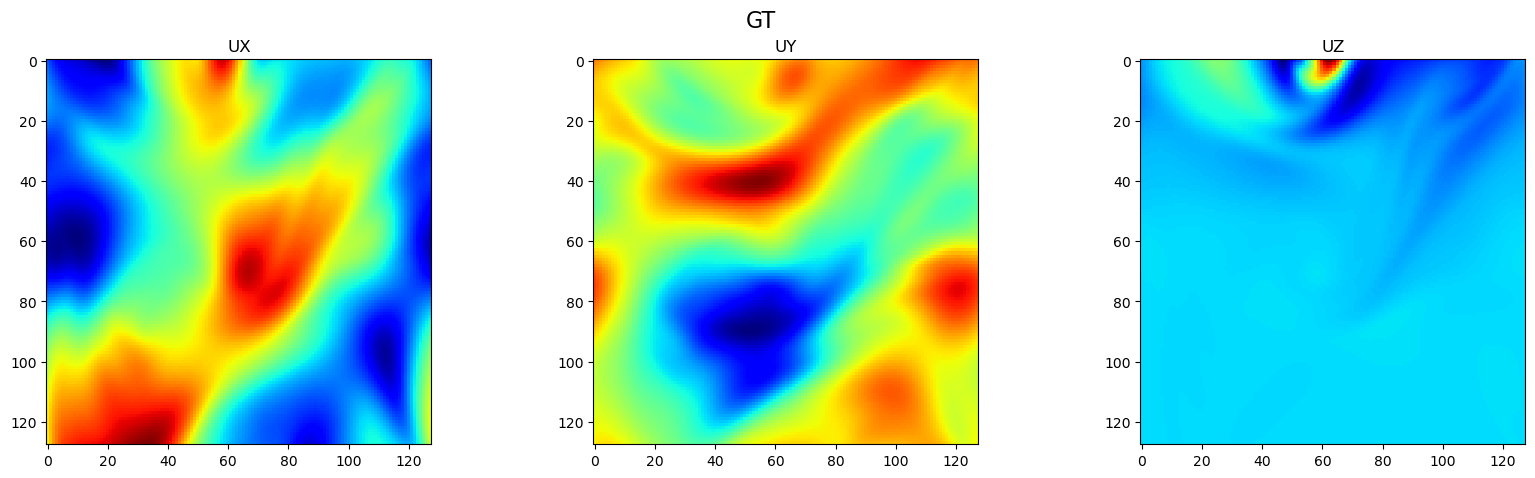

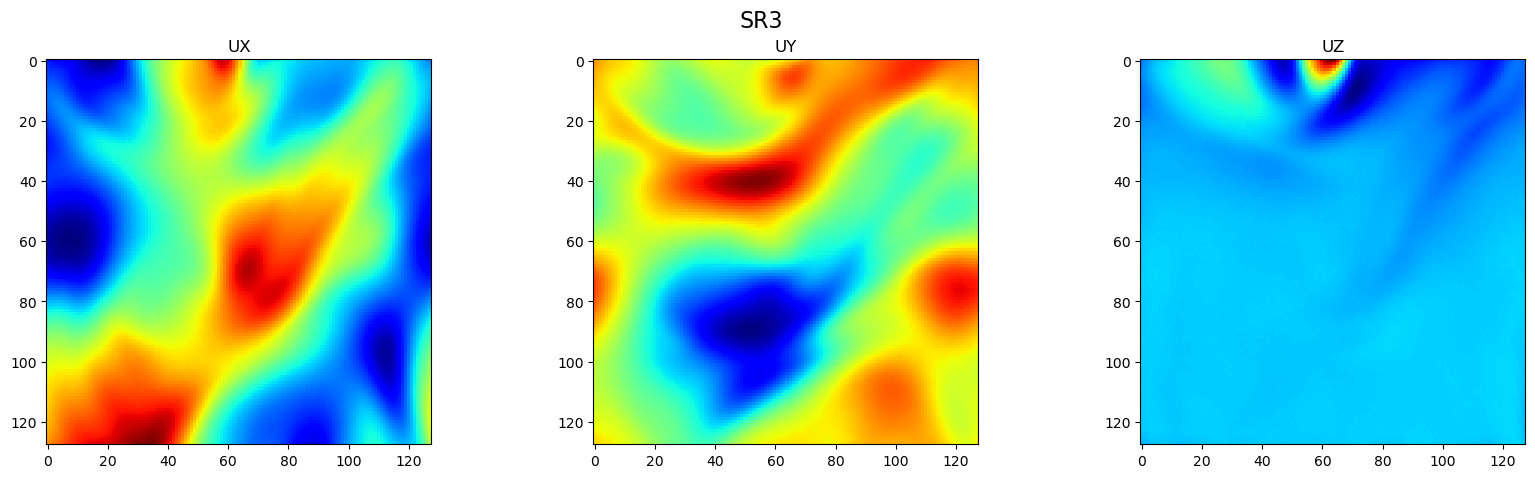

Sample  2


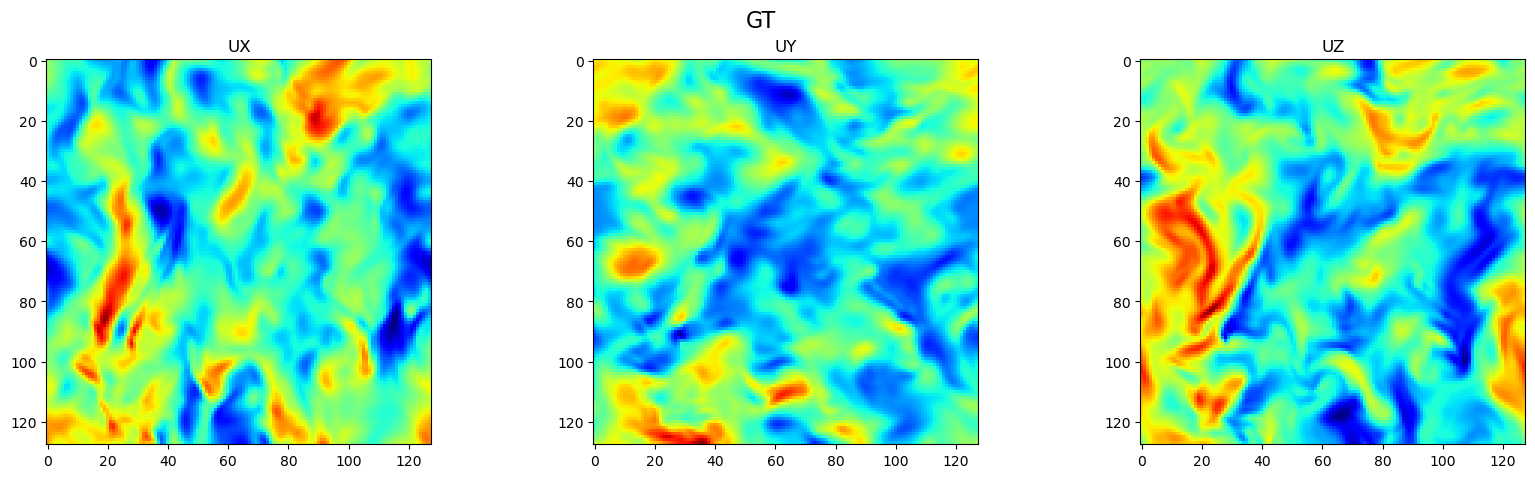

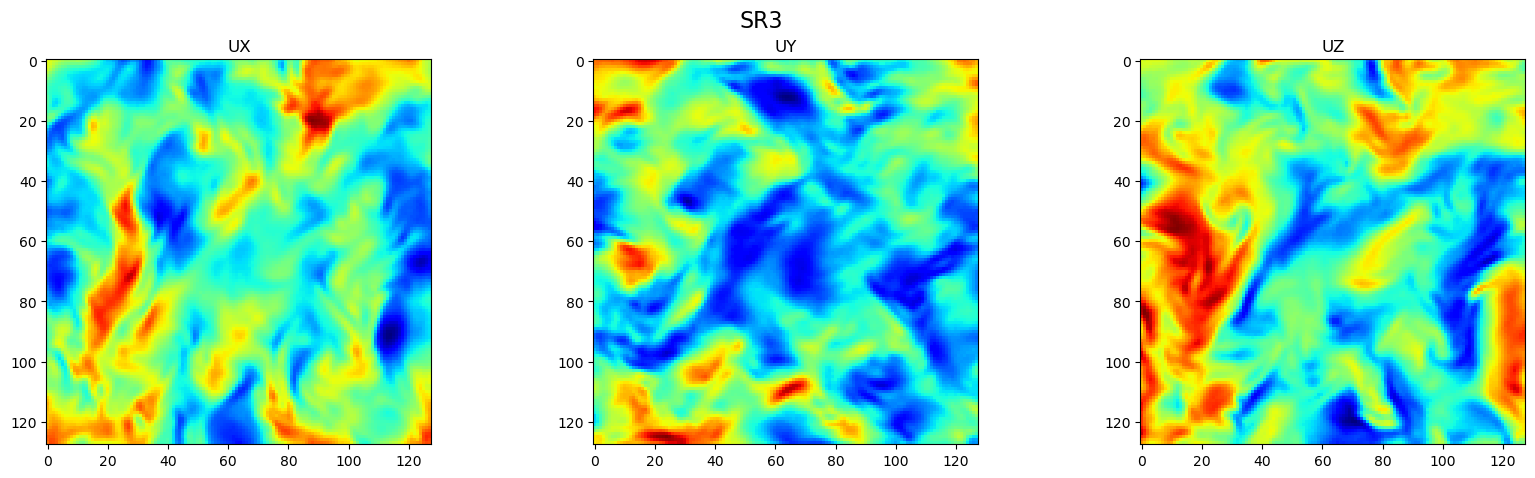

In [71]:
# plot all results for the validation set

for idx in range(3):
    print("Sample ",idx)
    
    # plot ground truth HR
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[2].imshow(high_res_val[idx,:,:,0], cmap='jet')
    axs[2].set_title('UZ')
    axs[1].imshow(high_res_val[idx,:,:,1], cmap='jet')
    axs[1].set_title('UY')
    axs[0].imshow(high_res_val[idx,:,:,2], cmap='jet')
    axs[0].set_title('UX')
    fig.suptitle("GT",fontsize=16)
    plt.show()

    # plot HR prediction
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[2].imshow(super_res_val[idx,:,:,0], cmap='jet')
    axs[2].set_title('UZ')
    axs[1].imshow(super_res_val[idx,:,:,1], cmap='jet')
    axs[1].set_title('UY')
    axs[0].imshow(super_res_val[idx,:,:,2], cmap='jet')
    axs[0].set_title('UX')
    fig.suptitle("SR3",fontsize=16)
    plt.show()

In [ ]:
sample_df = pd.read_csv(input_path+'/sample_submission.csv')

# Testing #

In [15]:
# testing

# Define the directory where the images are located
image_directory = "../../../experiments/sr_flame_ai_230912_175205/results"  # Replace with the actual path

# Define the number of images
num_images = 173

# Initialize empty arrays for high_res and super_res images
# high_res = []
super_res = []

# Loop through the image numbers
for image_number in range(1, num_images + 1):
    # Define the image filenames
#     hr_filename = f"{image_directory}/0_{image_number}_hr.png"
    sr_filename = f"{image_directory}/0_{image_number}_sr.png"

    # Read the super-resolution images

    sr_image = cv2.imread(sr_filename)

    # Append the images to the respective arrays
    super_res.append(sr_image)

# Convert the lists to NumPy arrays for easier manipulation
super_res = np.array(super_res)

# super_res[i] corresponds to the super-resolution image for index i


In [32]:
# testing
# plot super-resolution results for testing
# just for sanity check that they look plausbile
# num_images = 10
# for idx in range(0,num_images):

#     fig, axs = plt.subplots(1, 3, figsize=(20, 5))
#     axs[2].imshow(super_res[idx][:,:,0], cmap='jet')
#     axs[2].set_title('UZ')
#     axs[1].imshow(super_res[idx][:,:,1], cmap='jet')
#     axs[1].set_title('UY')
#     axs[0].imshow(super_res[idx][:,:,2], cmap='jet')
#     axs[0].set_title('UX')
#     fig.suptitle("SR3")
#     plt.show()

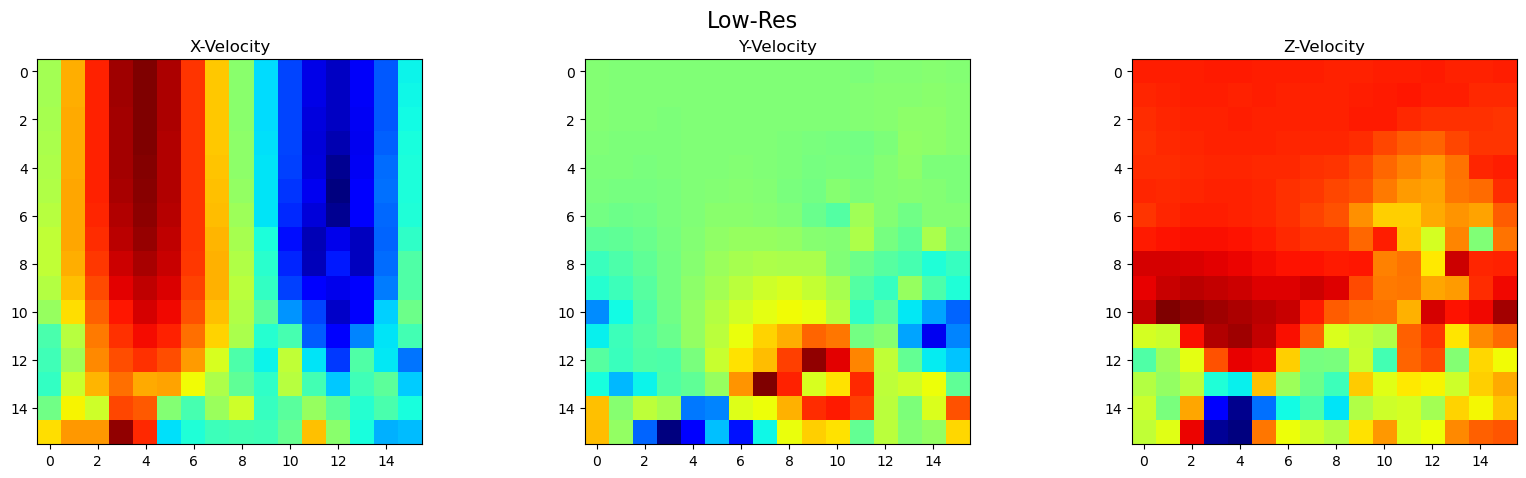

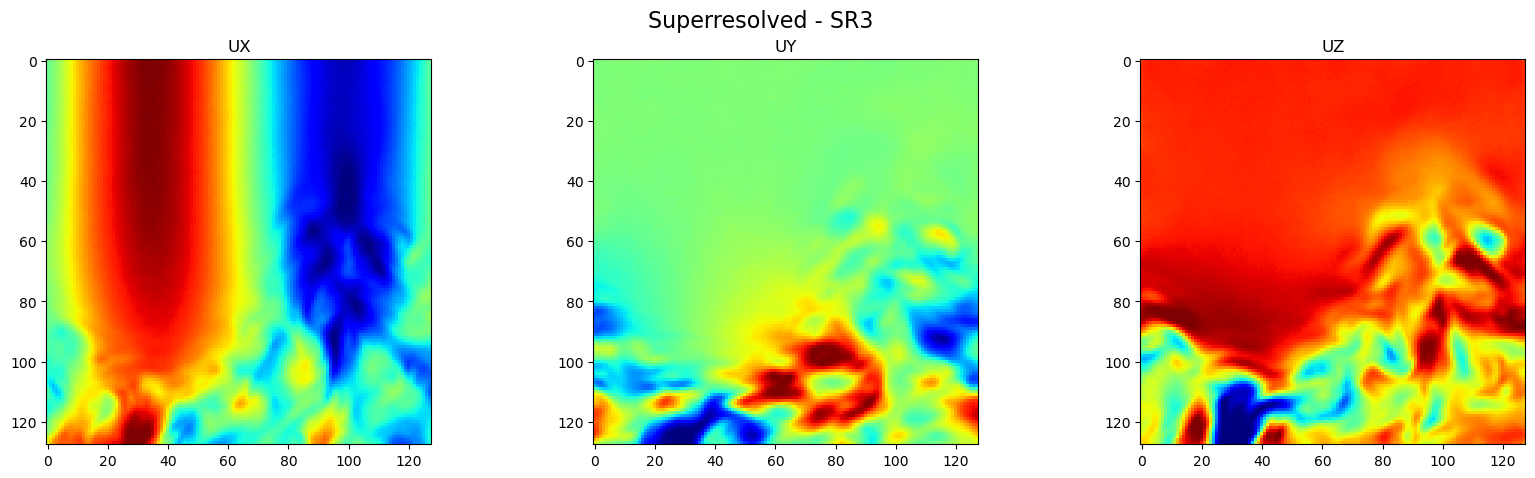

In [19]:
# plot low-res input compared to superresolved

idx = 1
data_path = input_path+"flowfields/LR/test"
UX_filename = test_df['ux_filename'][idx]
UY_filename = test_df['uy_filename'][idx]
UZ_filename = test_df['uz_filename'][idx]
UX = np.fromfile(data_path + "/" + UX_filename, dtype="<f4")
UY = np.fromfile(data_path + "/" + UY_filename, dtype="<f4")
UZ = np.fromfile(data_path + "/" + UZ_filename, dtype="<f4")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# axs[0].imshow(RHO.reshape(16, 16), cmap='jet')
# axs[0].set_title('Density')
axs[0].imshow(UX.reshape(16, 16), cmap='jet')
axs[0].set_title('X-Velocity')
axs[1].imshow(UY.reshape(16, 16), cmap='jet')
axs[1].set_title('Y-Velocity')
axs[2].imshow(UZ.reshape(16, 16), cmap='jet')
axs[2].set_title('Z-Velocity')
fig.suptitle("Low-Res", fontsize = 16)
plt.show()


fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[2].imshow(super_res[idx][:,:,0], cmap='jet')
axs[2].set_title('UZ')
axs[1].imshow(super_res[idx][:,:,1], cmap='jet')
axs[1].set_title('UY')
axs[0].imshow(super_res[idx][:,:,2], cmap='jet')
axs[0].set_title('UX')
fig.suptitle("Superresolved - SR3", fontsize = 16)
plt.show()

## Density ##

Since the SR3 model takes 3 channel inputs, the density has to be done in a separate run.
We will work with 3 channels as: [density, uy, uz].
In the previous case the channels were [ux,uy,uz].

/tmp/ipykernel_568636/345499072.py:30: RuntimeWarning: invalid value encountered in divide
  combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(128, 128).astype(np.uint8)


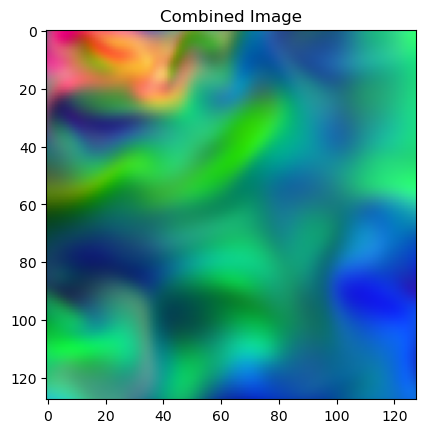

In [20]:
#HR training

# write png files with density
data_path = input_path+"flowfields/HR/train"
idx_list = list(range(0, train_samples))

# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((128, 128, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    RHO_filename = train_df['rho_filename'][idx]
    UX_filename = train_df['ux_filename'][idx]
    UY_filename = train_df['uy_filename'][idx]
    UZ_filename = train_df['uz_filename'][idx]
    RHO = np.fromfile(os.path.join(data_path, RHO_filename), dtype="<f4")
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    
    RHO_min, RHO_max = np.min(RHO), np.max(RHO)

    combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(128, 128).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/train_density/hr_128/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the last combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

/tmp/ipykernel_568636/3535572724.py:31: RuntimeWarning: invalid value encountered in divide
  combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(128, 128).astype(np.uint8)


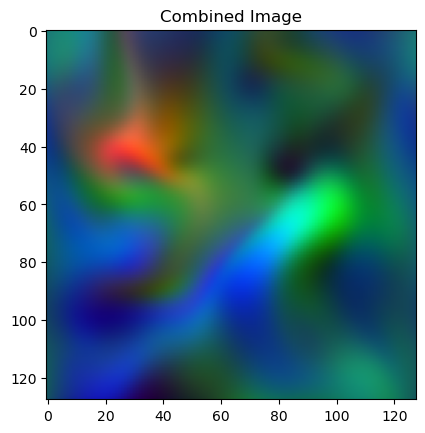

In [21]:
# HR validation
# write png files with density

data_path = input_path+"flowfields/HR/val"
idx_list = list(range(0, val_samples))


# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((128, 128, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    RHO_filename = val_df['rho_filename'][idx]
    UX_filename = val_df['ux_filename'][idx]
    UY_filename = val_df['uy_filename'][idx]
    UZ_filename = val_df['uz_filename'][idx]
    RHO = np.fromfile(os.path.join(data_path, RHO_filename), dtype="<f4")
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    
    RHO_min, RHO_max = np.min(RHO), np.max(RHO)

    combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(128, 128).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(128, 128).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/val_density/hr_128/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the last combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

/tmp/ipykernel_568636/598922266.py:30: RuntimeWarning: invalid value encountered in divide
  combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(16, 16).astype(np.uint8)


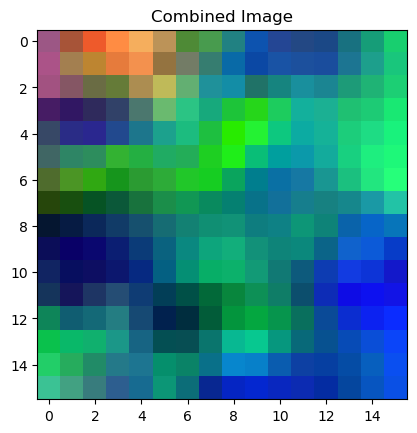

In [22]:
# LR train
# write png files with density 

data_path = input_path + "flowfields/LR/train"
idx_list = list(range(0, train_samples))

# Loop through the idx values
for idx in idx_list:
    # Create an empty array to accumulate channels
    combined_image = np.zeros((16, 16, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    RHO_filename = train_df['rho_filename'][idx]
    UX_filename = train_df['ux_filename'][idx]
    UY_filename = train_df['uy_filename'][idx]
    UZ_filename = train_df['uz_filename'][idx]
    
    RHO = np.fromfile(os.path.join(data_path, RHO_filename), dtype="<f4")
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    
    RHO_min, RHO_max = np.min(RHO), np.max(RHO)

    combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(16, 16).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/train_density/lr_16/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()


/tmp/ipykernel_568636/2108698912.py:30: RuntimeWarning: invalid value encountered in divide
  combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(16, 16).astype(np.uint8)


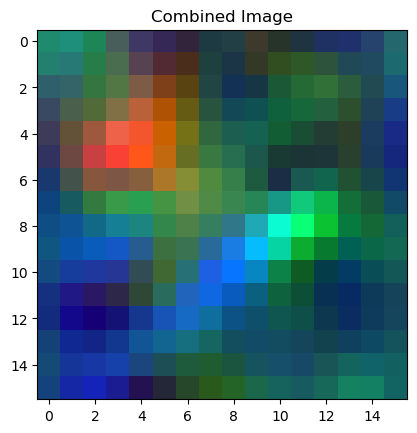

In [23]:
# LR val
# write density files to png

data_path = input_path + "flowfields/LR/val"
idx_list = list(range(0, val_samples))

# Loop through the idx values
for idx in idx_list:
    # Create an empty array to accumulate channels
    combined_image = np.zeros((16, 16, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    RHO_filename = val_df['rho_filename'][idx]
    UX_filename = val_df['ux_filename'][idx]
    UY_filename = val_df['uy_filename'][idx]
    UZ_filename = val_df['uz_filename'][idx]
    
    RHO = np.fromfile(os.path.join(data_path, RHO_filename), dtype="<f4")
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    
    RHO_min, RHO_max = np.min(RHO), np.max(RHO)

    combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(16, 16).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/val_density/lr_16/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()


/tmp/ipykernel_568636/2539005108.py:33: RuntimeWarning: invalid value encountered in divide
  combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(16, 16).astype(np.uint8)


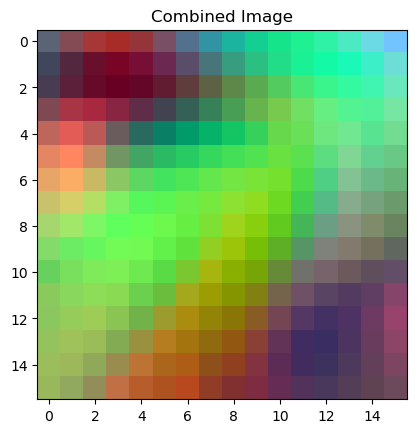

In [24]:
#LR testing
# write density to png

test_df = pd.read_csv(input_path+'/test.csv')
test_samples = test_df.shape[0]
data_path = input_path+"flowfields/LR/test"
idx_list = list(range(0, test_samples))

# Loop through the idx values
for idx in idx_list:
# Create an empty array to accumulate channels
    # Create an empty array to accumulate channels
    combined_image = np.zeros((16, 16, 3), dtype=np.uint8)

    # Load UX, UY, and UZ fields for the current idx
    RHO_filename = test_df['rho_filename'][idx]
    UX_filename = test_df['ux_filename'][idx]
    UY_filename = test_df['uy_filename'][idx]
    UZ_filename = test_df['uz_filename'][idx]
    
    RHO = np.fromfile(os.path.join(data_path, RHO_filename), dtype="<f4")
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    
    RHO_min, RHO_max = np.min(RHO), np.max(RHO)

    combined_image[..., 0] = ((RHO - RHO_min) / (RHO_max - RHO_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 1] = ((UY - UY_min) / (UY_max - UY_min) * 255).reshape(16, 16).astype(np.uint8)
    combined_image[..., 2] = ((UZ - UZ_min) / (UZ_max - UZ_min) * 255).reshape(16, 16).astype(np.uint8)

    # Define the output filename for the combined image
    output_filename = os.path.join('./png/test_density/lr_16/', f'{idx}.png')

    # Save the combined image as a PNG file
    plt.imsave(output_filename, combined_image)

# # Optionally, display the combined image
# plt.imshow(combined_image)
# plt.title("Combined Image")
# plt.show()

## Results with the density ##

In [25]:
### density
# testing

# Define the directory where the images are located
image_directory = "../../../experiments/sr_flame_ai_230913_094253/results"  # Replace with the actual path

# Define the number of images
num_images = 173

# Initialize empty arrays for high_res and super_res images
# high_res = []
rho_super_res = []

# Loop through the image numbers
for image_number in range(1, num_images + 1):
    # Define the image filenames
    sr_filename = f"{image_directory}/0_{image_number}_sr.png"

    # Read the high-resolution and super-resolution images
    sr_image = cv2.imread(sr_filename)

    # Append the images to the respective arrays
    rho_super_res.append(sr_image)

# Convert the lists to NumPy arrays for easier manipulation
rho_super_res = np.array(rho_super_res)

# Now, high_res and super_res contain the loaded images as NumPy arrays
# super_res[i] corresponds to the super-resolution image for index i


In [31]:
#testing
# plot results from test

# for idx in range(0,5):

#     fig, axs = plt.subplots(1, 3, figsize=(20, 5))
#     axs[2].imshow(rho_super_res[idx][:,:,0], cmap='jet')
#     axs[2].set_title('UZ')
#     axs[1].imshow(rho_super_res[idx][:,:,1], cmap='jet')
#     axs[1].set_title('UY')
#     axs[0].imshow(rho_super_res[idx][:,:,2], cmap='jet')
#     axs[0].set_title('RHO')
#     fig.suptitle("SR3")
#     plt.show()

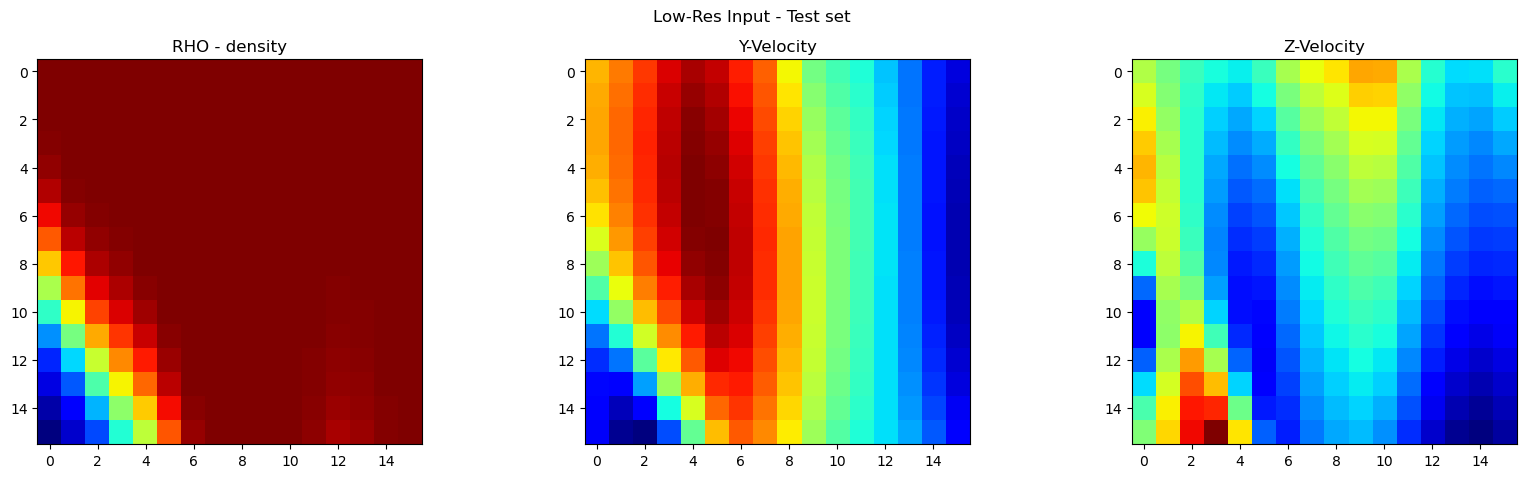

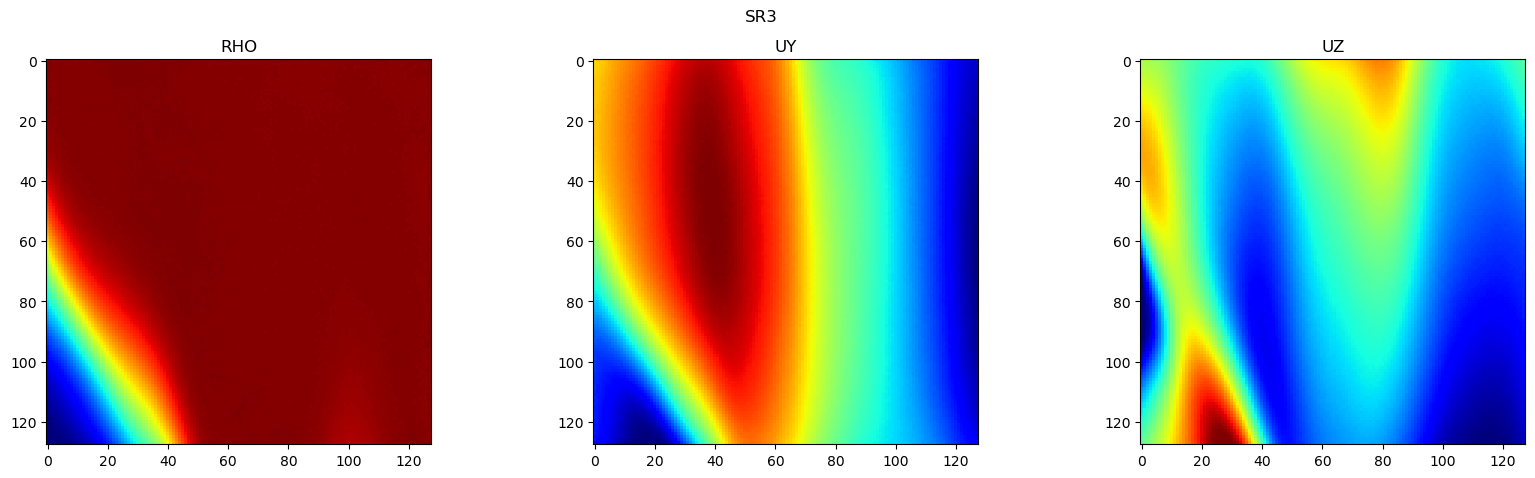

In [30]:
idx = 0
data_path = input_path+"flowfields/LR/test"
RHO_filename = test_df['rho_filename'][idx]
UX_filename = test_df['ux_filename'][idx]
UY_filename = test_df['uy_filename'][idx]
UZ_filename = test_df['uz_filename'][idx]
RHO = np.fromfile(data_path + "/" + RHO_filename, dtype="<f4")
UX = np.fromfile(data_path + "/" + UX_filename, dtype="<f4")
UY = np.fromfile(data_path + "/" + UY_filename, dtype="<f4")
UZ = np.fromfile(data_path + "/" + UZ_filename, dtype="<f4")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# axs[0].imshow(RHO.reshape(16, 16), cmap='jet')
# axs[0].set_title('Density')
axs[0].imshow(RHO.reshape(16, 16), cmap='jet')
axs[0].set_title('RHO - density')
axs[1].imshow(UY.reshape(16, 16), cmap='jet')
axs[1].set_title('Y-Velocity')
axs[2].imshow(UZ.reshape(16, 16), cmap='jet')
axs[2].set_title('Z-Velocity')
fig.suptitle("Low-Res Input - Test set")
plt.show()


fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[2].imshow(rho_super_res[idx][:,:,0], cmap='jet')
axs[2].set_title('UZ')
axs[1].imshow(rho_super_res[idx][:,:,1], cmap='jet')
axs[1].set_title('UY')
axs[0].imshow(rho_super_res[idx][:,:,2], cmap='jet')
axs[0].set_title('RHO')
fig.suptitle("SR3")
plt.show()

# Rescale results to physical range from image scale #

Since we converted everything to png images, everythin was scaled to be between 0 and 255. Now we will scale back the final results.

We will use the results from the first run for ux, uy, and uz. We will use only the density channel from the second run.

In [38]:
#LR testing

test_df = pd.read_csv(input_path+'/test.csv')
test_samples = test_df.shape[0]
data_path = input_path+"flowfields/LR/test"
idx_list = list(range(0, test_samples))

# Create an empty list to accumulate rescaled images
rescaled_images = []

# Loop through the idx values
for idx in idx_list:
    # Load UX, UY, UZ, and RHO fields for the current idx
    UX_filename = test_df['ux_filename'][idx]
    UY_filename = test_df['uy_filename'][idx]
    UZ_filename = test_df['uz_filename'][idx]
    RHO_filename = test_df['rho_filename'][idx]

    RHO = np.fromfile(os.path.join(data_path, RHO_filename), dtype="<f4")
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")

    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    RHO_min, RHO_max = np.min(RHO), np.max(RHO)
    
    # Rescale the images back to their original range
    RHO_rescaled = (rho_super_res[idx][:,:,2].astype(float) / 255.0) * (RHO_max - RHO_min) + RHO_min
    UX_rescaled = (super_res[idx][:,:,2].astype(float) / 255.0) * (UX_max - UX_min) + UX_min
    UY_rescaled = (super_res[idx][:,:,1].astype(float) / 255.0) * (UY_max - UY_min) + UY_min
    UZ_rescaled = (super_res[idx][:,:,0].astype(float) / 255.0) * (UZ_max - UZ_min) + UZ_min
    
    # Append the rescaled images to the list
    rescaled_images.append([RHO_rescaled, UX_rescaled, UY_rescaled, UZ_rescaled])

# Convert the list of rescaled images into a big matrix
rescaled_matrix = np.stack(rescaled_images, axis=0)



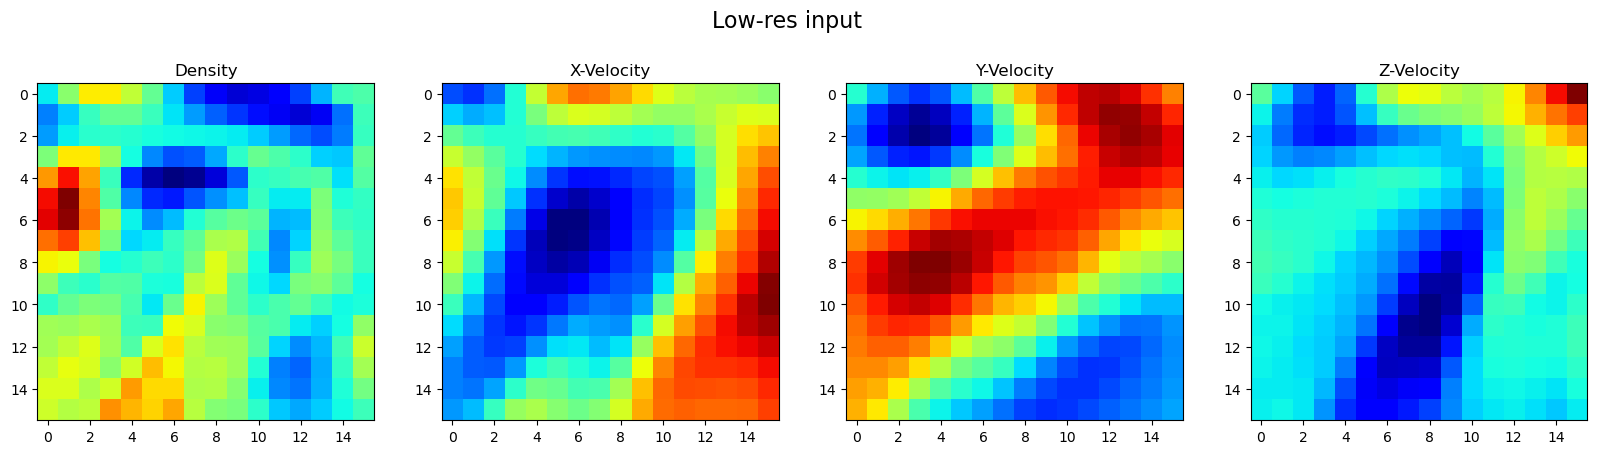

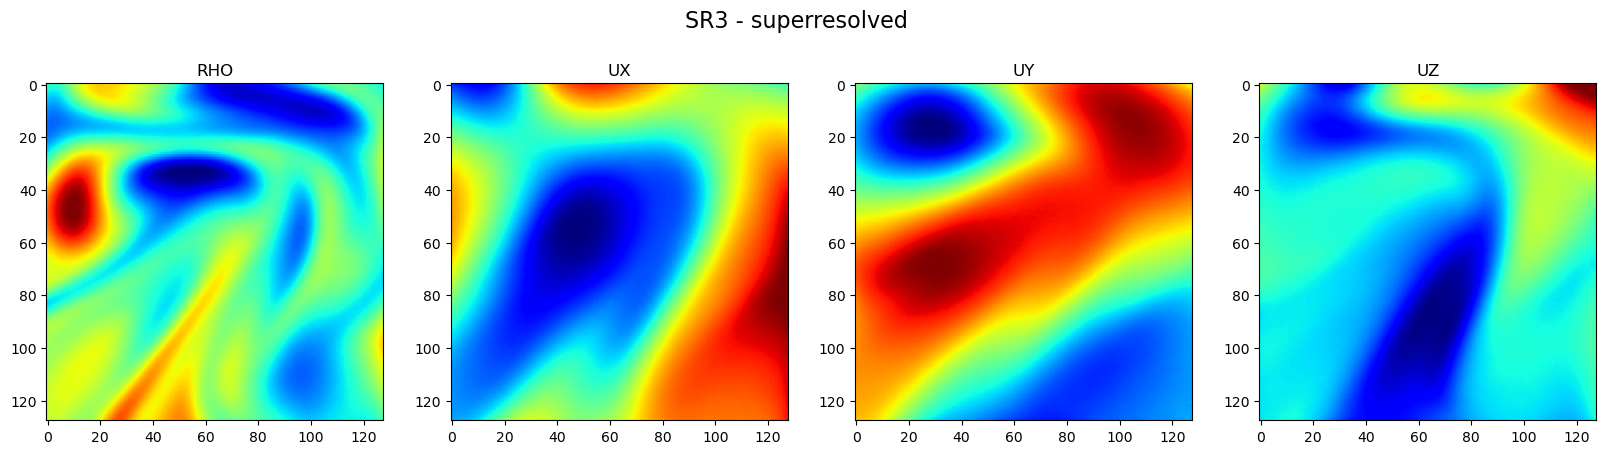

In [40]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(RHO.reshape(16, 16), cmap='jet')
axs[0].set_title('Density')
axs[1].imshow(UX.reshape(16, 16), cmap='jet')
axs[1].set_title('X-Velocity')
axs[2].imshow(UY.reshape(16, 16), cmap='jet')
axs[2].set_title('Y-Velocity')
axs[3].imshow(UZ.reshape(16, 16), cmap='jet')
axs[3].set_title('Z-Velocity')
fig.suptitle("Low-res input", fontsize = 16)
plt.show()


fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[3].imshow(rescaled_matrix[idx,3,:,:], cmap='jet')
axs[3].set_title('UZ')
axs[2].imshow(rescaled_matrix[idx,2,:,:], cmap='jet')
axs[2].set_title('UY')
axs[1].imshow(rescaled_matrix[idx,1,:,:], cmap='jet')
axs[1].set_title('UX')
axs[0].imshow(rescaled_matrix[idx,0,:,:], cmap='jet')
axs[0].set_title('RHO')
fig.suptitle("SR3 - superresolved", fontsize = 16)
plt.show()

In [42]:
my_mean = [0.24, 28.0, 28.0, 28.0]
my_std = [0.068, 48.0, 48.0, 48.0]

# scale according to submission requirements

# Create an empty list to accumulate scaled images
scaled_images = []

# Loop through the idx values
for idx in idx_list:
    # Load rescaled images for the current idx
    RHO_rescaled, UX_rescaled, UY_rescaled, UZ_rescaled = rescaled_images[idx]

    # Apply the scaling transformation for each channel
    RHO_scaled = (RHO_rescaled - my_mean[0]) / my_std[0]
    UX_scaled = (UX_rescaled - my_mean[1]) / my_std[1]
    UY_scaled = (UY_rescaled - my_mean[2]) / my_std[2]
    UZ_scaled = (UZ_rescaled - my_mean[3]) / my_std[3]

    # Append the scaled images to the list
    scaled_images.append([RHO_scaled, UX_scaled, UY_scaled, UZ_scaled])

# Convert the list of scaled images into a 4D array
scaled_matrix = np.stack(scaled_images, axis=0)

In [43]:
# prepare submission format


#gets test set input
def getTestX(idx):
    csv_file = test_df.reset_index().to_dict(orient='list')
    LR_path = input_path+"flowfields/LR/test" 
    id = csv_file['id'][idx]

    return id

def predict(idx):
    id = getTestX(idx)
    y_pred = scaled_matrix[idx,:,:,:]
    return id,y_pred

In [44]:
ids = []
y_preds = {}
for idx in range(len(test_df)):
    id,y_pred = predict(idx) 
    #WARNING tmp should be in SI units
    y_pred = np.transpose(y_pred, (0, 2, 1))
    y_preds[id]= np.array(y_pred).flatten(order='F').astype(np.float32)
    ids.append(id)
df = pd.DataFrame.from_dict(y_preds,orient='index')
df['id'] = ids
#move id to first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
#reset index
df = df.reset_index(drop=True)

In [ ]:
# save results to csv

df.to_csv(output_path+'submission.csv',index=False)

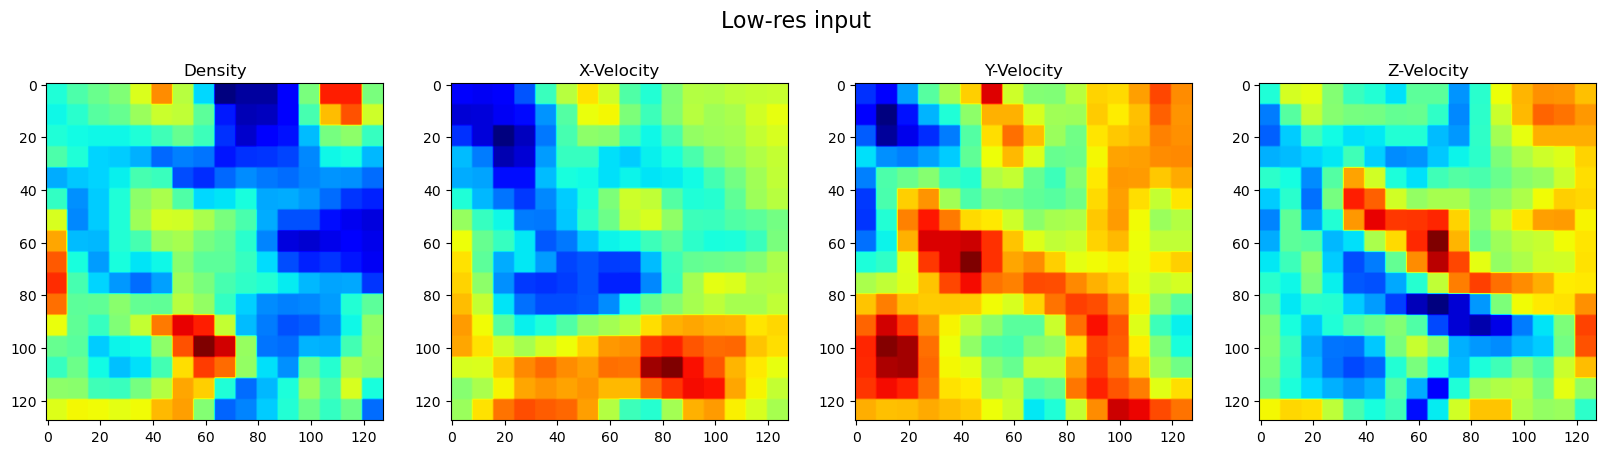

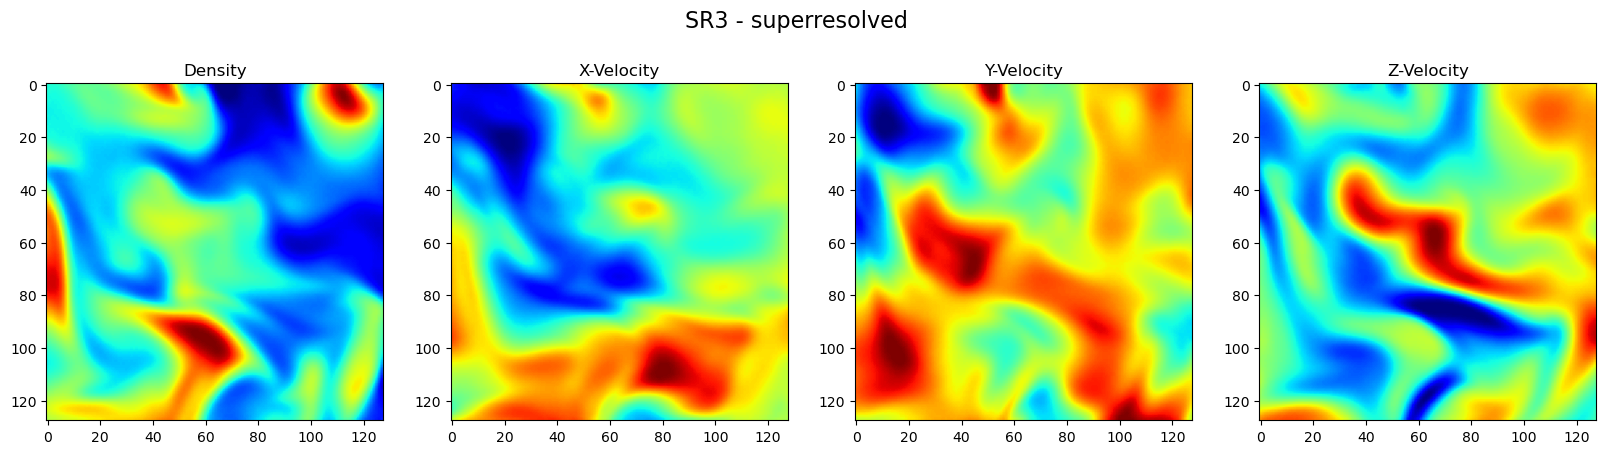

In [56]:
# to double check format
# plot results from interpolation and super-resolution

sm = np.array(sample_df.iloc[11][1:])
my = np.array(df.iloc[11][1:])

# reshape
sm_rs = sm.reshape((4,128,128),order = 'F')
my_rs = my.reshape((4,128,128),order = 'F')


fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(sm_rs[0,:,:], cmap='jet')
axs[0].set_title('Density')
axs[1].imshow(sm_rs[1,:,:], cmap='jet')
axs[1].set_title('X-Velocity')
axs[2].imshow(sm_rs[2,:,:], cmap='jet')
axs[2].set_title('Y-Velocity')
axs[3].imshow(sm_rs[3,:,:], cmap='jet')
axs[3].set_title('Z-Velocity')
fig.suptitle("Low-res input", fontsize = 16)
plt.show()


fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(my_rs[0,:,:], cmap='jet')
axs[0].set_title('Density')
axs[1].imshow(my_rs[1,:,:], cmap='jet')
axs[1].set_title('X-Velocity')
axs[2].imshow(my_rs[2,:,:], cmap='jet')
axs[2].set_title('Y-Velocity')
axs[3].imshow(my_rs[3,:,:], cmap='jet')
axs[3].set_title('Z-Velocity')
fig.suptitle("SR3 - superresolved", fontsize = 16)
plt.show()

### Calculate MSE values for predictions in val set ###

Sample:  0 , Ux error:  0.00014546228920123637
Sample:  0 , Ux error:  7.073567907386823e-05
Sample:  0 , Ux error:  0.00013269715351860734


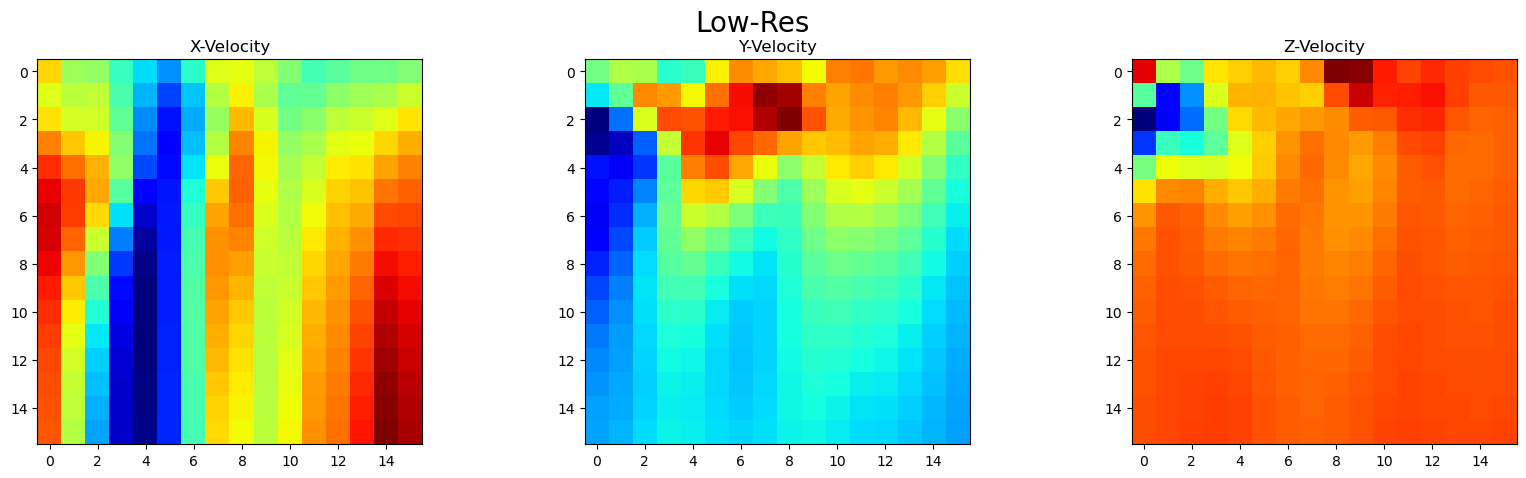

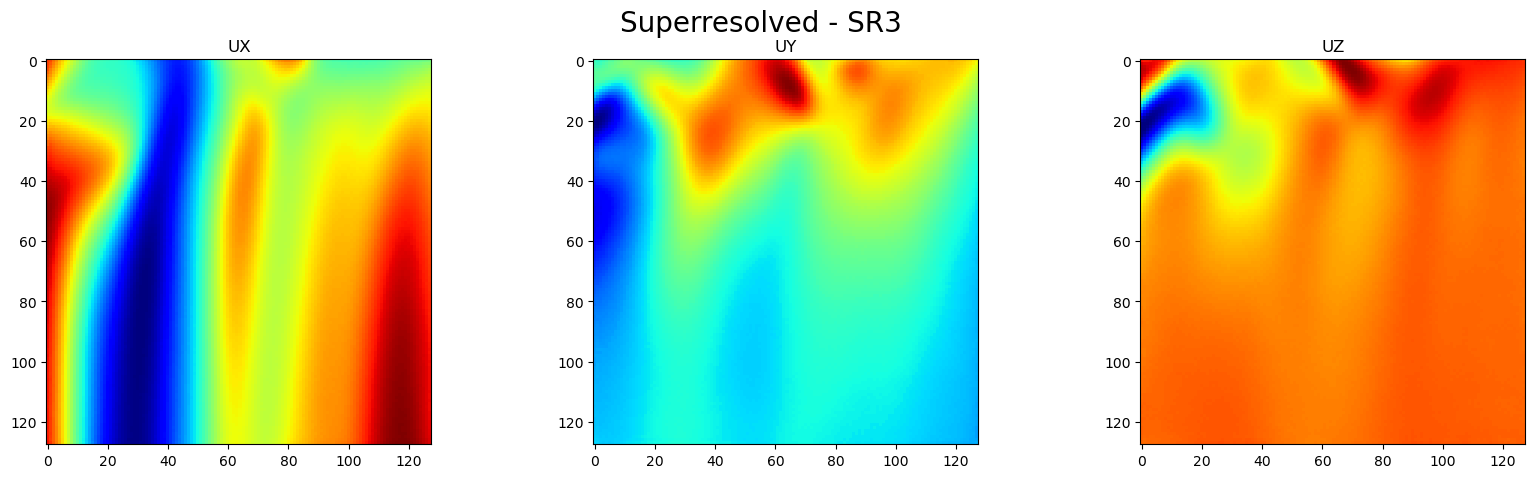

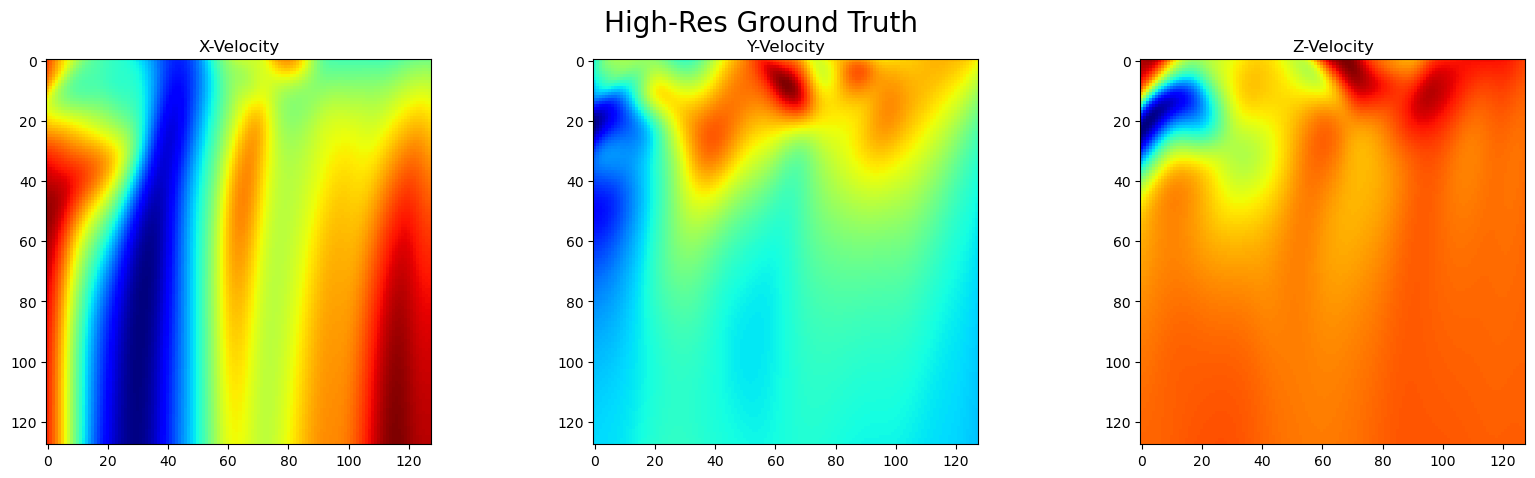

Sample:  1 , Ux error:  0.001804741831922192
Sample:  1 , Ux error:  0.0044603756312083746
Sample:  1 , Ux error:  6.343306234766071e-09


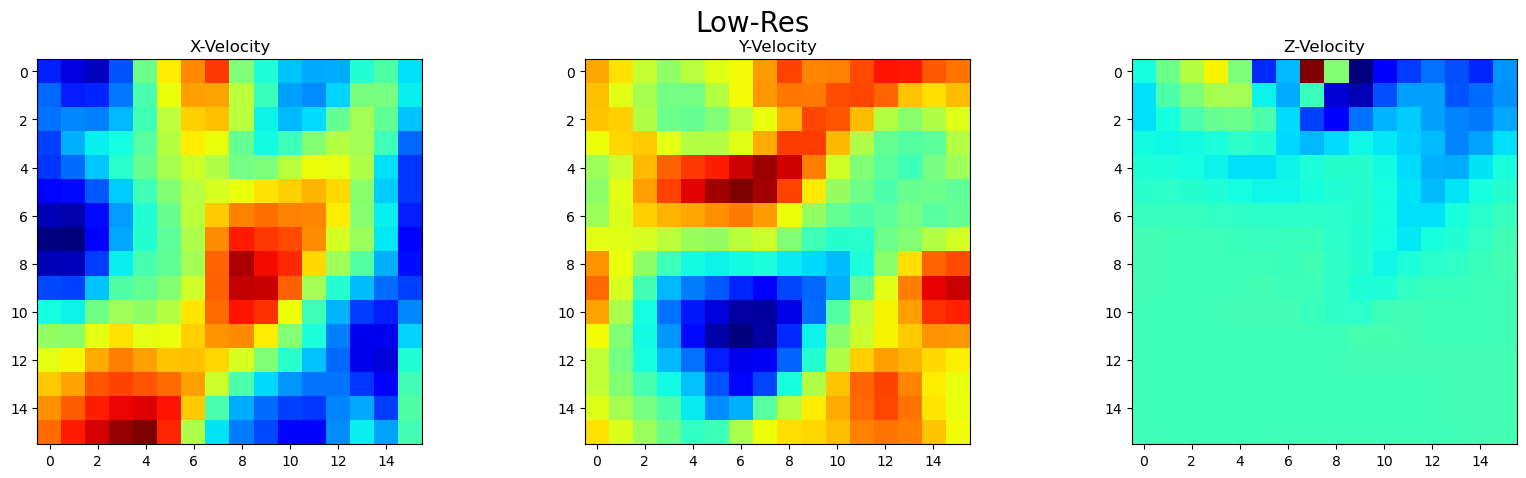

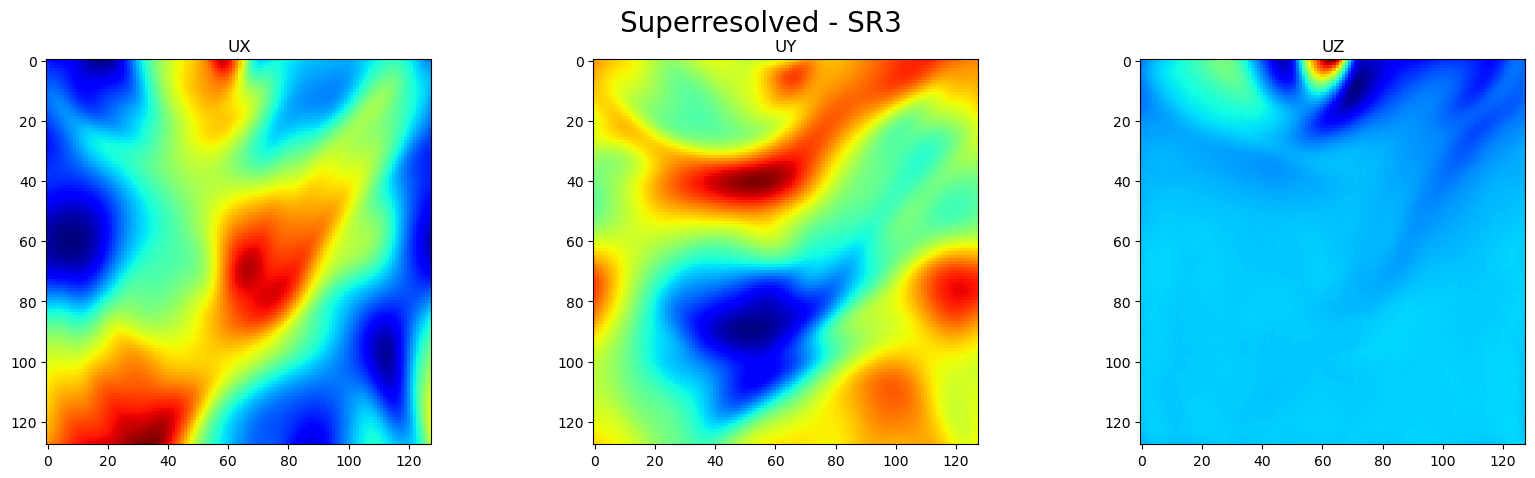

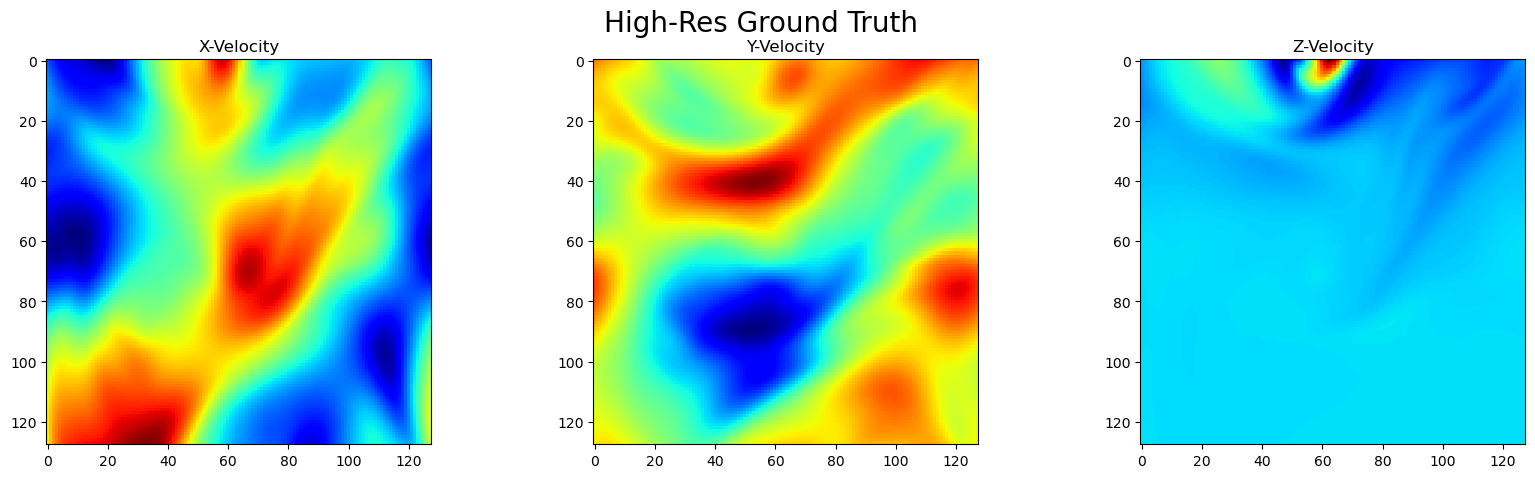

Sample:  2 , Ux error:  0.037540742525727325
Sample:  2 , Ux error:  0.045040708940249516
Sample:  2 , Ux error:  0.03484663017319729


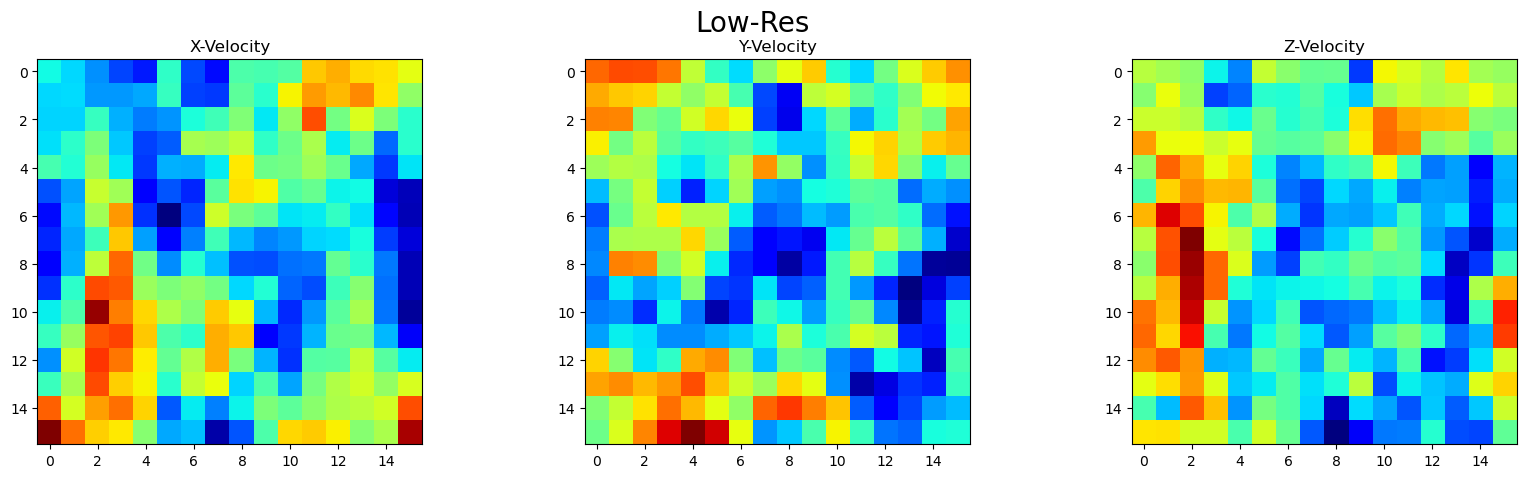

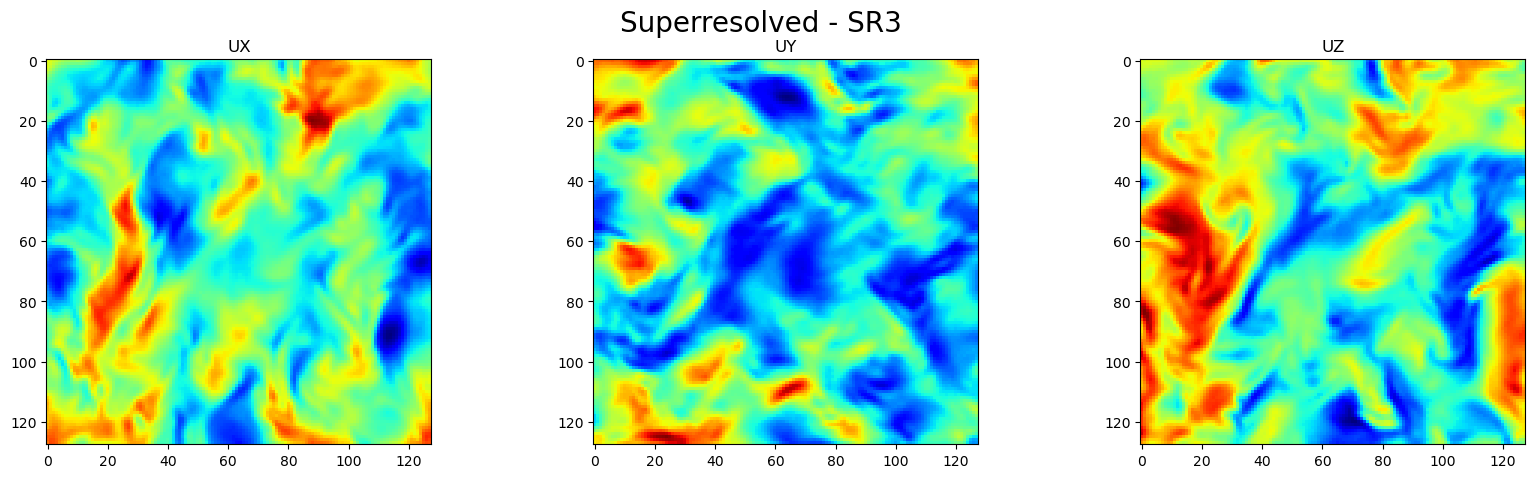

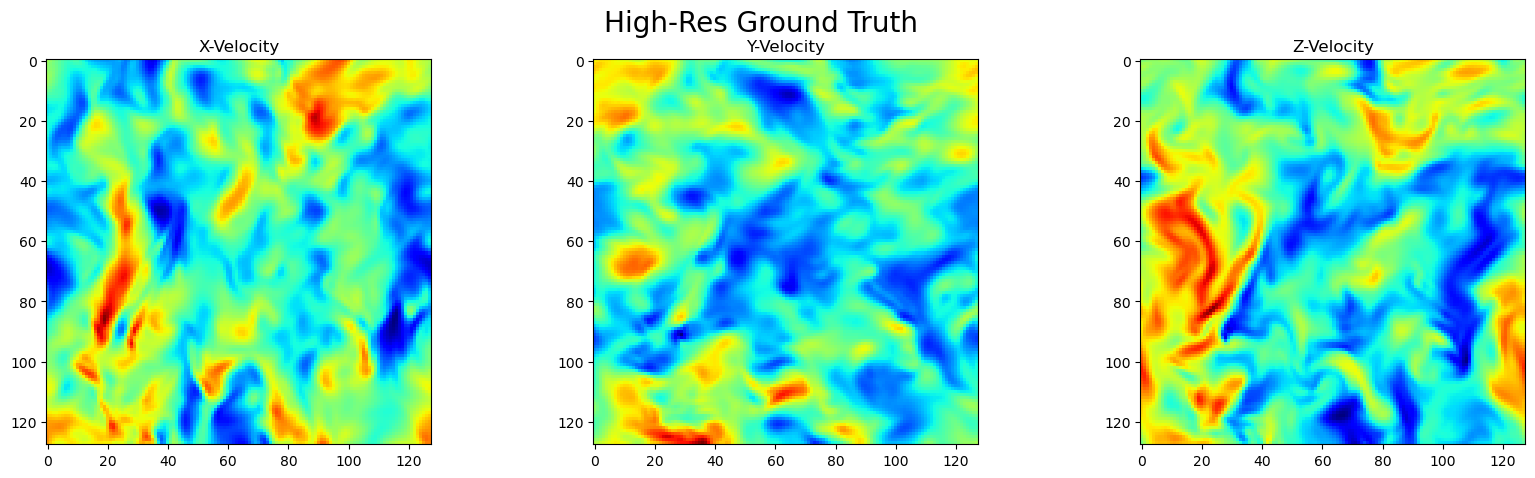

Sample:  3 , Ux error:  0.009778454956688727
Sample:  3 , Ux error:  0.0013755630602525321
Sample:  3 , Ux error:  1.3908047643372287e-11


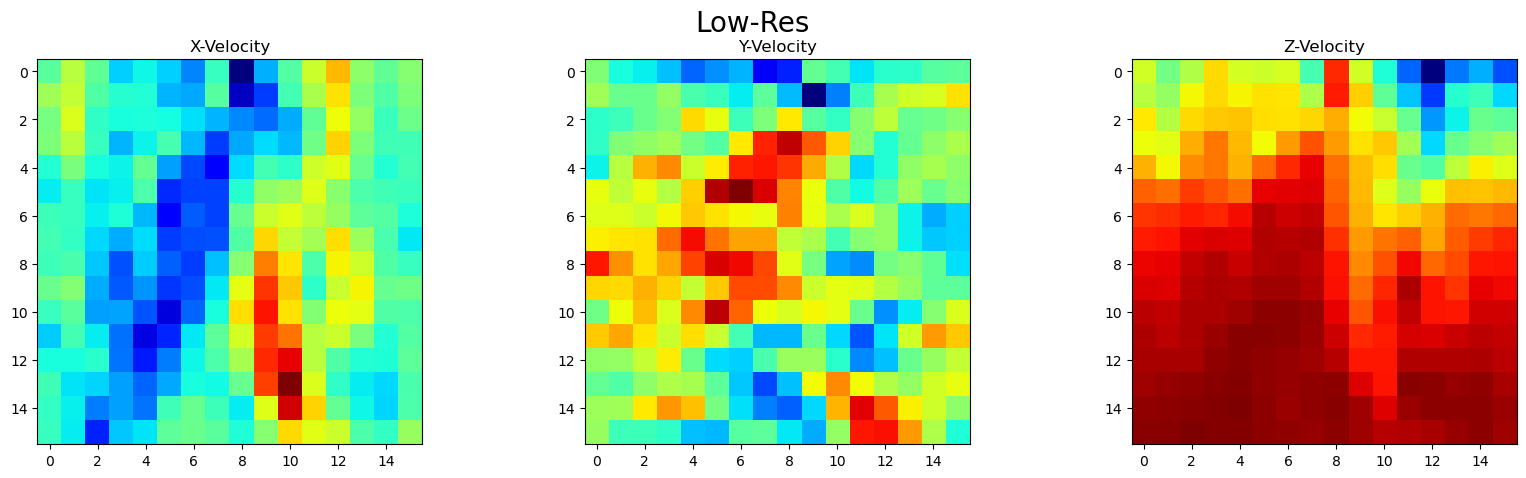

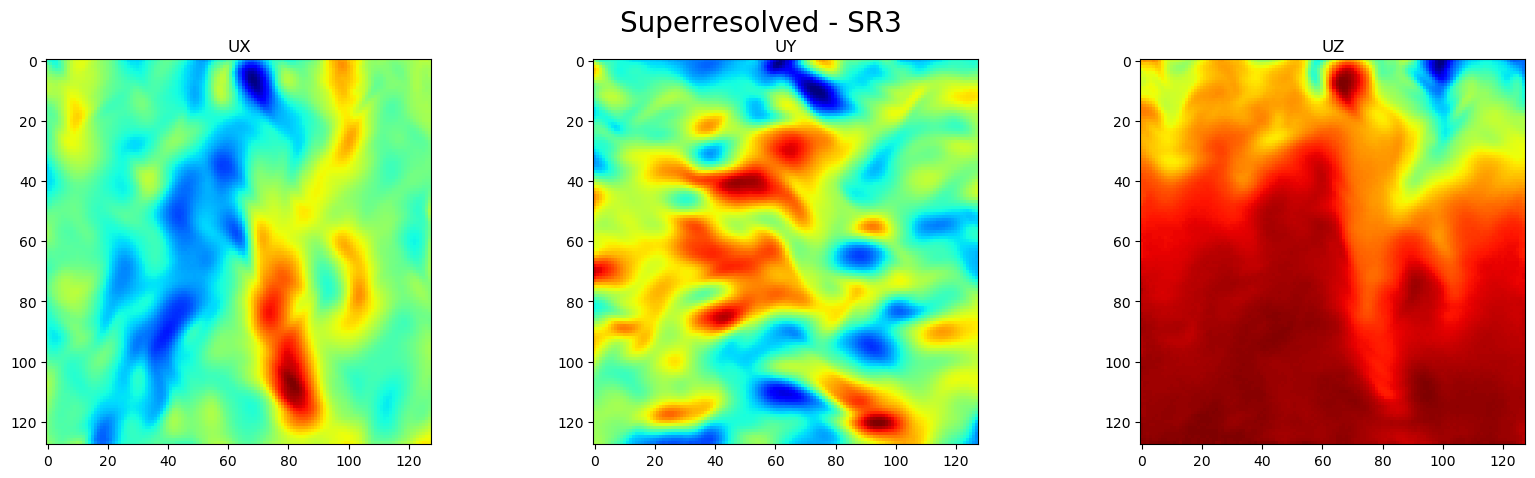

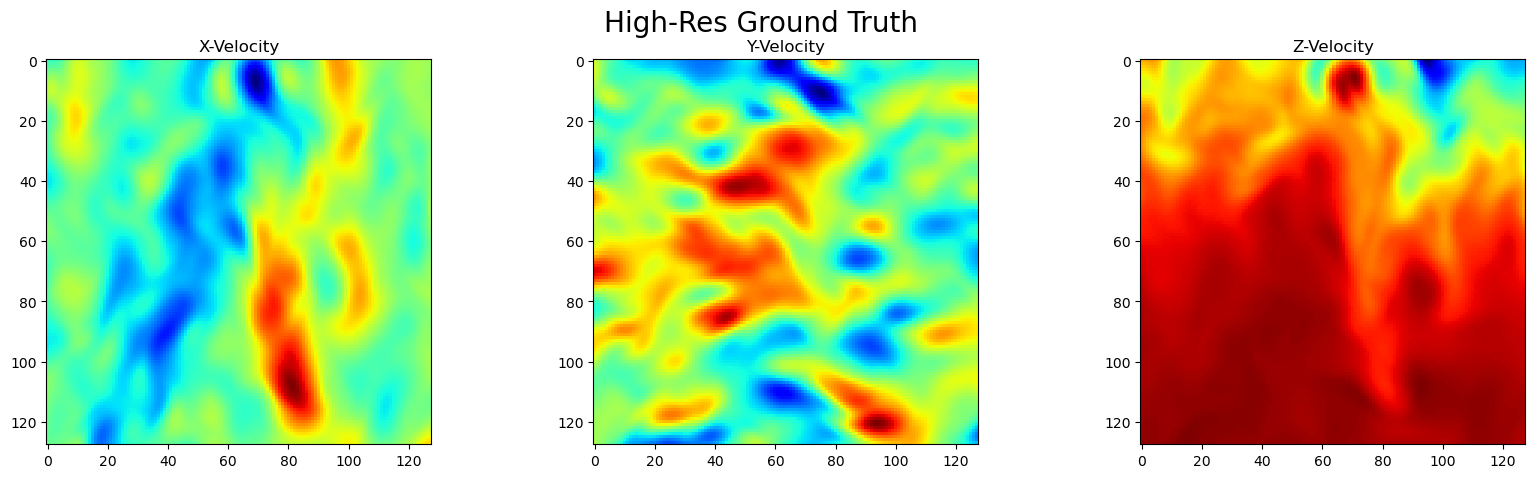

Sample:  4 , Ux error:  0.0006260003469549928
Sample:  4 , Ux error:  0.0003451818538687361
Sample:  4 , Ux error:  0.00021195284972808852


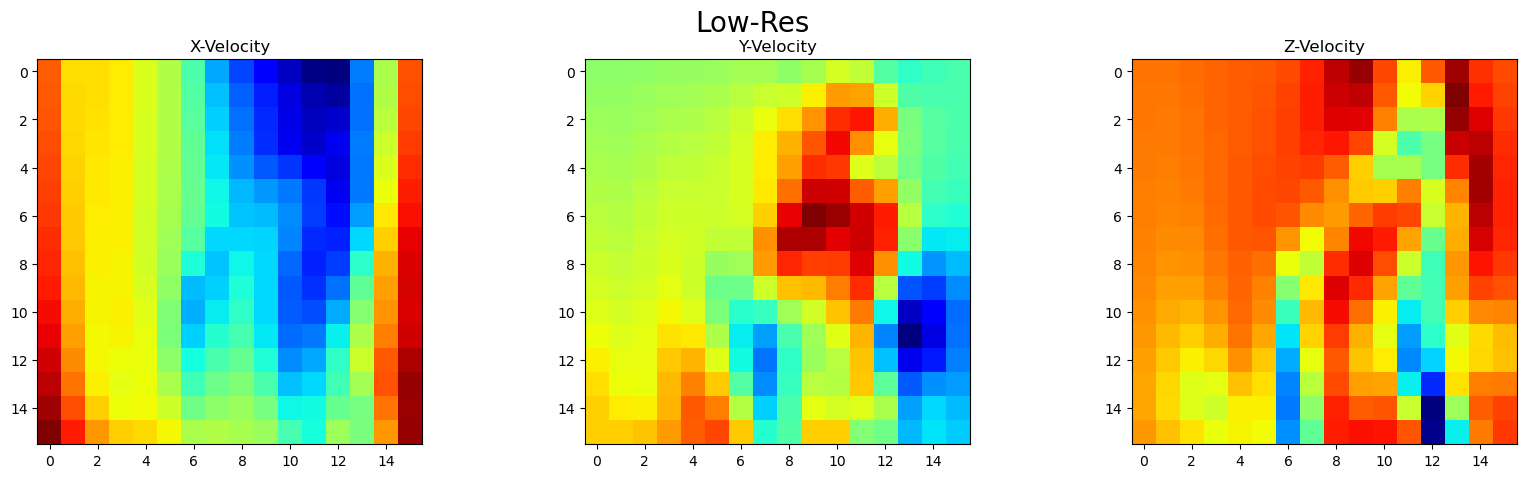

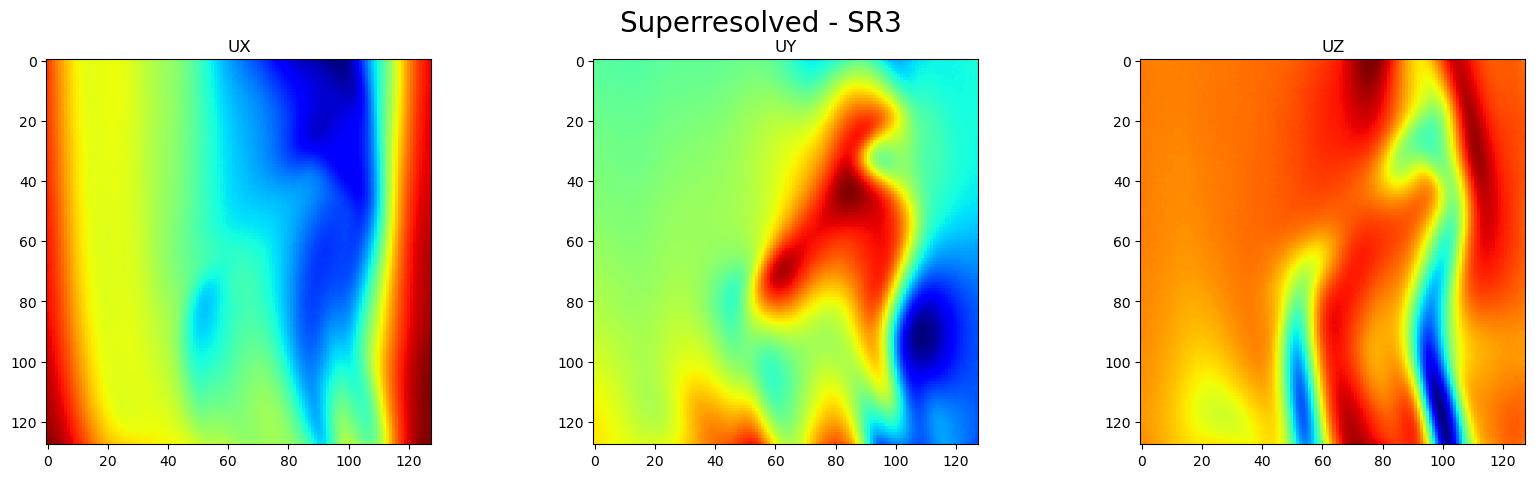

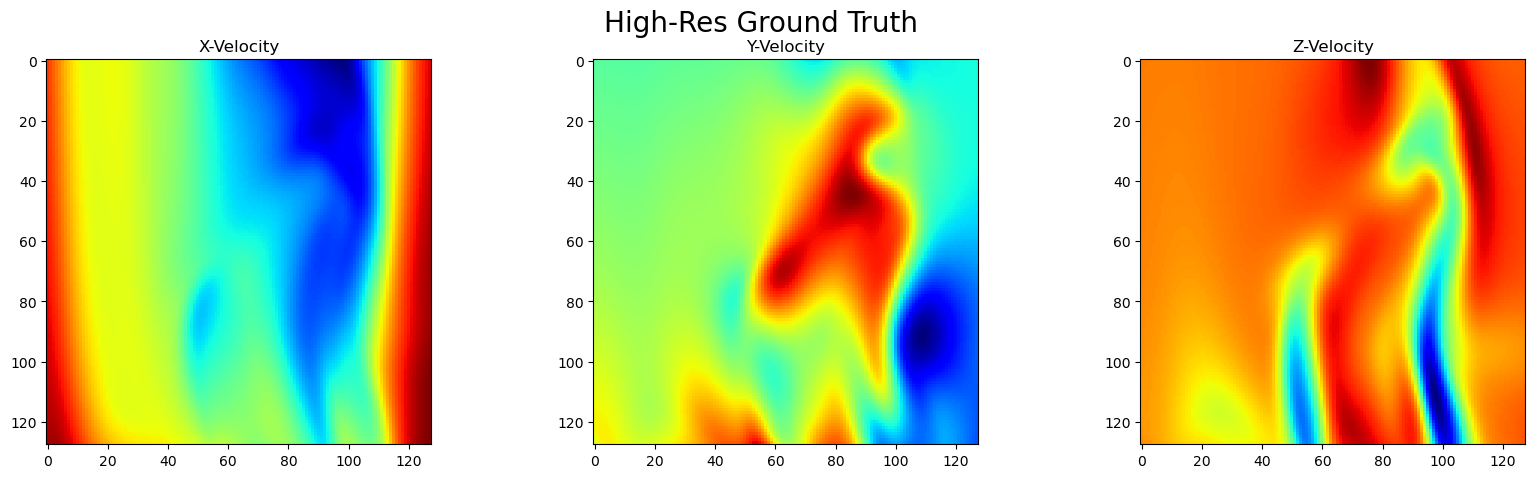

In [62]:

data_path = input_path+"flowfields/LR/val"
data_path_HR = input_path+"flowfields/HR/val"
my_mean = [0.24, 28.0, 28.0, 28.0]
my_std = [0.068, 48.0, 48.0, 48.0]

mse = 0.0

for idx in range(0,5):
   
        # Load UX, UY, and UZ fields for the current idx
    UX_filename = val_df['ux_filename'][idx]
    UY_filename = val_df['uy_filename'][idx]
    UZ_filename = val_df['uz_filename'][idx]
    UX = np.fromfile(os.path.join(data_path, UX_filename), dtype="<f4")
    UY = np.fromfile(os.path.join(data_path, UY_filename), dtype="<f4")
    UZ = np.fromfile(os.path.join(data_path, UZ_filename), dtype="<f4")
    
    
    UX_HR = np.fromfile(os.path.join(data_path_HR, UX_filename), dtype="<f4")
    UY_HR = np.fromfile(os.path.join(data_path_HR, UY_filename), dtype="<f4")
    UZ_HR = np.fromfile(os.path.join(data_path_HR, UZ_filename), dtype="<f4")

    
    UX_HR_scaled = (UX_HR - my_mean[1]) / my_std[1]
    UY_HR_scaled = (UY_HR - my_mean[2]) / my_std[2]
    UZ_HR_scaled = (UZ_HR - my_mean[3]) / my_std[3]
    
    # Normalize each channel separately to the range [0, 255]
    UX_min, UX_max = np.min(UX), np.max(UX)
    UY_min, UY_max = np.min(UY), np.max(UY)
    UZ_min, UZ_max = np.min(UZ), np.max(UZ)
    
    UX_rescaled = (super_res_val[idx][:,:,2].astype(float) / 255.0) * (UX_max - UX_min) + UX_min
    UY_rescaled = (super_res_val[idx][:,:,1].astype(float) / 255.0) * (UY_max - UY_min) + UY_min
    UZ_rescaled = (super_res_val[idx][:,:,0].astype(float) / 255.0) * (UZ_max - UZ_min) + UZ_min
    
    
    UX_scaled = (UX_rescaled - my_mean[1]) / my_std[1]
    UY_scaled = (UY_rescaled - my_mean[2]) / my_std[2]
    UZ_scaled = (UZ_rescaled - my_mean[3]) / my_std[3]
    
    
    x_err = np.sum((UX_HR_scaled.reshape(128,128) - UX_scaled)**2)/128/128
    y_err = np.sum((UY_HR_scaled.reshape(128,128) - UY_scaled)**2)/128/128
    z_err = np.sum((UZ_HR_scaled.reshape(128,128) - UZ_scaled)**2)/128/128
    avg_err = (x_err + y_err + z_err)/3
    mse += avg_err
    
    print("Sample: ", idx,", Ux error: ", x_err)
    print("Sample: ", idx,", Ux error: ", y_err)
    print("Sample: ", idx,", Ux error: ", z_err)
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[0].imshow(UX.reshape(16, 16), cmap='jet')
    axs[0].set_title('X-Velocity')
    axs[1].imshow(UY.reshape(16, 16), cmap='jet')
    axs[1].set_title('Y-Velocity')
    axs[2].imshow(UZ.reshape(16, 16), cmap='jet')
    axs[2].set_title('Z-Velocity')
    fig.suptitle("Low-Res", fontsize = 20)
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[2].imshow(super_res_val[idx,:,:,0], cmap='jet')
    axs[2].set_title('UZ')
    axs[1].imshow(super_res_val[idx,:,:,1], cmap='jet')
    axs[1].set_title('UY')
    axs[0].imshow(super_res_val[idx,:,:,2], cmap='jet')
    axs[0].set_title('UX')
    fig.suptitle("Superresolved - SR3", fontsize = 20)
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[0].imshow(UX_HR.reshape(128, 128), cmap='jet')
    axs[0].set_title('X-Velocity')
    axs[1].imshow(UY_HR.reshape(128, 128), cmap='jet')
    axs[1].set_title('Y-Velocity')
    axs[2].imshow(UZ_HR.reshape(128, 128), cmap='jet')
    axs[2].set_title('Z-Velocity')
    fig.suptitle("High-Res Ground Truth", fontsize = 20)
    plt.show()